<a href="https://colab.research.google.com/github/theobourgault/Python-class-TD-1/blob/main/Python_for_finance_Exam_CF_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Before you start**
* **Deactivate any generative AI assistance tool:**
  * Go to Tools
  * Go to Settings
  * Go to AI Assistance
  * Tick the box "Hide generative AI features"

You will be penalized if you start the test with generative AI features enabled. Let me know if you need help.

### **Generative AI is not allowed**
### **All documents posted on your Python for Finance classroom are allowed**
### **The following websites are allowed (all other websites are not allowed)**
  * [yfinance](https://ranaroussi.github.io/yfinance/)
  * [pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)
  * [numpy maths functions](https://substackcdn.com/image/fetch/$s_!RRkG!,f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F282013b7-68d4-4307-9828-2607c35d56d4_3562x3984.jpeg)

# Exam duration : 2h30

# Part 1 : programming exercises

### **Exercise 1**
Write a Python program that:

  * Asks the user to input the daily return of a stock (as a percentage, e.g., 1.5 or -0.7).

  * Prints:

    * "Profit" if the return is positive,

    * "Loss" if it’s negative,

    * "No change" if it’s exactly zero.

  * With the additional condition:

    * If the return is greater than 2%, print "Strong gain" instead.

    * If the return is less than -2%, print "Strong loss" instead.

In [66]:
def judgereturn(retour):
  if retour>0:
    if retour>2:
      print("Strong gain")
    else:
      print("Profit")
  elif retour<0:
    if retour<-2:
      print("Strong loss")
    else:
      print("Loss")
  elif retour==0:
    print("No change")
  else :
    print("This is not a return")


In [68]:
judgereturn(-3)

Strong loss


### **Exercise 2**
Write a Python script that simulates the growth of an investment over several years.

  * Start with an initial capital of 1000 €.

  * For each year from 1 to 5, assume a 5% annual return.

  * Use a for loop to compute and print the capital at the end of each year, like:
    * Year 1: 1050€
    * Year 2: 1102.5€
    * ...
  * After the loop, print the total gain (final – initial).

In [38]:
def growth(amount):
  initial = amount
  x = 1
  while x<=5:
    amount = amount * 1.05
    print('Year ',x,': ',amount,'€')
    x=x+1

  gain = amount - initial
  print("Total gain: ",gain, "€")

In [39]:
growth(1000)

Year  1 :  1050.0 €
Year  2 :  1102.5 €
Year  3 :  1157.625 €
Year  4 :  1215.5062500000001 €
Year  5 :  1276.2815625000003 €
Total gain:  276.2815625000003 €


# Part 2 : Data analysis and manipulation


### **1. Load some stocks information into a pandas DataFrame**
* Using the yfinance module, use this code to download stock information from Apple, Microsoft, and the S&P 500 index:
  * `!pip install yfinance`
  * `import yfinance as yf`
  * `tickers = ['AAPL', 'MSFT', '^GSPC']`
  * `df = yf.download(tickers, start='2018-01-01')`

**a. Inspect the dataframe. What do you notice ?**


In [58]:
!pip install yfinance
import yfinance as yf
tickers = ['AAPL', 'MSFT', '^GSPC']
df = yf.download(tickers, start='2018-01-01')

/tmp/ipython-input-1197191252.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start='2018-01-01')
[*********************100%***********************]  3 of 3 completed


In [60]:
df.head()

Price           Close                               High             \
Ticker           AAPL       MSFT        ^GSPC       AAPL       MSFT   
Date                                                                  
2018-01-02  40.380997  79.198311  2695.810059  40.390375  79.530032   
2018-01-03  40.373970  79.566917  2713.060059  40.917824  79.714352   
2018-01-04  40.561497  80.267212  2723.989990  40.664642  80.774010   
2018-01-05  41.023296  81.262360  2743.149902  41.110030  81.465079   
2018-01-08  40.870941  81.345299  2747.709961  41.166308  81.621736   

Price                          Low                               Open  \
Ticker            ^GSPC       AAPL       MSFT        ^GSPC       AAPL   
Date                                                                    
2018-01-02  2695.889893  39.677740  78.783663  2682.360107  39.888719   
2018-01-03  2714.370117  40.310679  79.216770  2697.770020  40.444296   
2018-01-04  2729.290039  40.338800  79.769630  2719.070068  40.446630   
2018-01-05  2743.449951  40.566180  80.562058  2727.919922  40.657604   
2018-01-08  2748.510010  40.772482  80.718715  2737.600098  40.870941   

Price                                  Volume                        
Ticker           MSFT        ^GSPC       AAPL      MSFT       ^GSPC  
Date                                                                 
2018-01-02  79.364171  2683.729980  102223600  22483800  3397430000  
2018-01-03  79.299697  2697.850098  118071600  26061400  3544030000  
2018-01-04  79.788056  2719.310059   89738400  21912000  3697340000  
2018-01-05  80.773994  2731.330078   94640000  23407100  3239280000  
2018-01-08  81.271581  2742.669922   82271200  22113000  3246160000

In [ ]:
#I notice that GSPC has significatively a higher price than apple and MSFT, a higher volume traded also.

**b. Plot the 'Close' column by directly using the `plot()` function of** `pandas`

<Axes: xlabel='Date'>

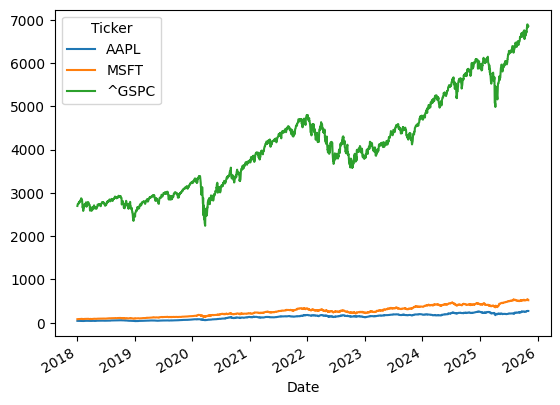

In [70]:
df.plot(y='Close', use_index = True)

### **2. Data manipulation**
**a. Compute returns of the 'Close' column. Store the result in a new dataframe (a new variable), and inspect this new dataframe.**



In [76]:
df['Daily return'] = df['Close','AAPL'].pct_change()
df['Daily return'] = df['Close','MSFT'].pct_change()
df['Daily return'] = df['Close','^GSPC'].pct_change()
df.head()

Price           Close                               High             \
Ticker           AAPL       MSFT        ^GSPC       AAPL       MSFT   
Date                                                                  
2018-01-02  40.380997  79.198311  2695.810059  40.390375  79.530032   
2018-01-03  40.373970  79.566917  2713.060059  40.917824  79.714352   
2018-01-04  40.561497  80.267212  2723.989990  40.664642  80.774010   
2018-01-05  41.023296  81.262360  2743.149902  41.110030  81.465079   
2018-01-08  40.870941  81.345299  2747.709961  41.166308  81.621736   

Price                          Low                               Open  \
Ticker            ^GSPC       AAPL       MSFT        ^GSPC       AAPL   
Date                                                                    
2018-01-02  2695.889893  39.677740  78.783663  2682.360107  39.888719   
2018-01-03  2714.370117  40.310679  79.216770  2697.770020  40.444296   
2018-01-04  2729.290039  40.338800  79.769630  2719.070068  40.446630   
2018-01-05  2743.449951  40.566180  80.562058  2727.919922  40.657604   
2018-01-08  2748.510010  40.772482  80.718715  2737.600098  40.870941   

Price                                  Volume                        \
Ticker           MSFT        ^GSPC       AAPL      MSFT       ^GSPC   
Date                                                                  
2018-01-02  79.364171  2683.729980  102223600  22483800  3397430000   
2018-01-03  79.299697  2697.850098  118071600  26061400  3544030000   
2018-01-04  79.788056  2719.310059   89738400  21912000  3697340000   
2018-01-05  80.773994  2731.330078   94640000  23407100  3239280000   
2018-01-08  81.271581  2742.669922   82271200  22113000  3246160000   

Price      Daily return  
Ticker                   
Date                     
2018-01-02          NaN  
2018-01-03     0.006399  
2018-01-04     0.004029  
2018-01-05     0.007034  
2018-01-08     0.001662

**b. Compute the correlation of the returns of AAPL and MSFT with S&P 500.**

hint: there is a function in pandas that can help you



**c. Compute the cumulative returns by calculating the cumulative product over the returns. Store the result in a new dataframe, and plot it by calling the `pandas` plot function on it.**

hint: the cumulative return is the cumulative product of 1 + the returns



**d. Compute the annual returns, assuming that there are 252 trading days per year.**

hint: this can be done by taking the mean return value and multiply by 252, or more accurately by averaging the cumulative return: retrieve the last line of the cumulative returns, divide it by the size of the data and multiply by 252.


**e. Compute the daily volatility : the standard deviation of returns multiplied by the square root of the number of trading days in a year (252).**
